In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import os
print(os.getcwd())

/home/lab-phuc/Desktop/dp/NbAFL


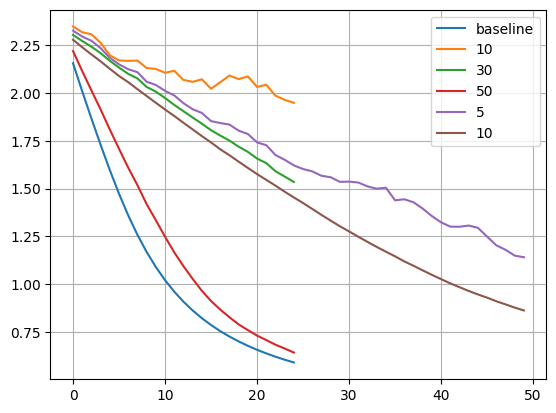

In [6]:
def load_gen(filename, eval_type):
    with open('results/' + filename, 'rb') as fp:
        data = pickle.load(fp)['val'][eval_type]
        return data

list_e = ["baseline", "10", "30", "50"]
eval_type = "loss"
filename = "baseline/N5_K5_T25.pkl"
data_baseline = load_gen(filename, eval_type)
plt.plot(data_baseline["avg"])

for e in list_e[1:]:
    filename_dp = f"dp/N5_K5_E{e}_T25_C1.pkl"
    data_dp = load_gen(filename_dp, eval_type)
    plt.plot(data_dp["avg"])

filename_dp = f"dp/N5_K5_DPC512_BS512_E30_T50_C1.pkl"
data_baseline = load_gen(filename_dp, eval_type)
plt.plot(data_baseline["avg"])

filename_dp = f"dp/N20_K20_DPC2048_BS64_E30_T25_C1.pkl"
data_baseline = load_gen(filename_dp, eval_type)
plt.plot(data_baseline["avg"])

filename_dp = f"dp/N20_K20_DPC2048_BS2048_E30_T50_C1.pkl"
data_baseline = load_gen(filename_dp, eval_type)
plt.plot(data_baseline["avg"])

plt.legend(list_e+["5", "10", "20"])
plt.grid()

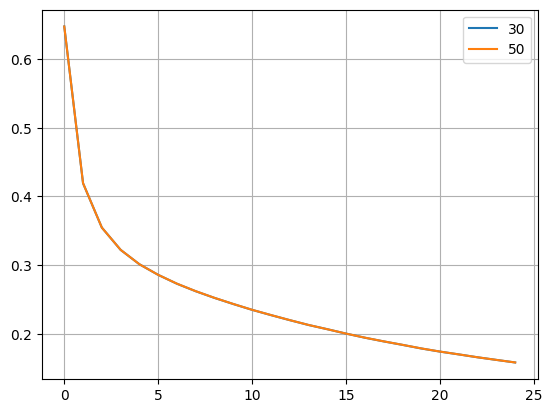

In [20]:
filename_dp = f"dp/N20_K20_DPC2048_BS64_E30_T25_C1.pkl"
data_baseline = load_gen(filename_dp, eval_type)
plt.plot(data_baseline["avg"])

filename_dp = f"dp/N20_K20_DPC2048_BS64_E50_T25_C1.pkl"
data_baseline = load_gen(filename_dp, eval_type)
plt.plot(data_baseline["avg"])

plt.legend(["30", "50"])
plt.grid()

In [93]:
def get_mnist_iid(dataset, num_users, num_items):
    """
    Sample I.I.D. client data from MNIST dataset
    :param dataset:
    :param num_users:
    :return: dict of image index
    """
    dict_users, all_idxs = {}, [i for i in range(len(dataset))]
    for i in range(num_users):
        dict_users[i] = list(np.random.choice(all_idxs, num_items, replace=False))
        all_idxs = list(set(all_idxs) - set(dict_users[i]))
    return dict_users

def load_data() -> Tuple[torch.utils.data.DataLoader, torch.utils.data.DataLoader]:
    """Load CIFAR-10 (training and test set)."""
    transform = transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    )
    trainset = datasets.MNIST(
        Path.DATA_ROOT, train=True, download=True, transform=transform
    )
    testset = datasets.MNIST(
        Path.DATA_ROOT, train=False, download=True, transform=transform
    )

    num_examples = {"trainset": len(trainset), "testset": len(testset)}
    print(num_examples)

    return trainset, testset

In [65]:
dataset_train, dataset_test = load_data()

{'trainset': 60000, 'testset': 10000}


In [67]:
dict_users = get_mnist_iid(
            dataset_train, 10, 512
        )

In [89]:
data = [[0 for i in range(10)] for i in range(10)]
for j in range(10):
    for i in range(len(dict_users[j])):
        data[j][dataset_train[dict_users[1][i]][1]] += 1

In [90]:
data

[[66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42],
 [66, 57, 37, 61, 47, 49, 49, 62, 42, 42]]

In [91]:
dict_users[1][2]

55171

In [92]:
dict_users[2][2]

16646